In [1]:
# !pip install sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
bmi = pd.read_csv("bmi_500.csv")
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


산점도를 통한 탐색적 분석

In [3]:
bmi = pd.read_csv("bmi_500.csv", index_col='Label')
# 산점도를 표시하는 함수를 만들어보자~!
def myScatter(label, color) :
    # 원하는 레이블값을 인덱싱
    tmp = bmi.loc[label]
    # scatter : 산점도로 표시하는 명령
    plt.scatter(tmp['Weight'],     # x축 데이터 설정
                tmp['Height'],     # y축 데이터 설정
                c = color,         # 색상을 결정하는 명령
                label = label      # label로 설정하는 명령
                )

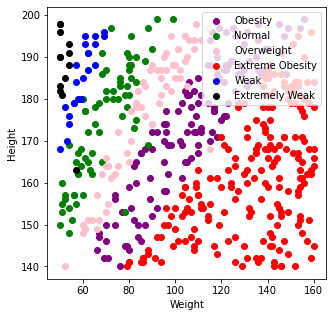

In [4]:
plt.figure(figsize=(5,5))

myScatter("Obesity","purple")
myScatter("Normal","green")
myScatter("Overweight","pink")
myScatter("Extreme Obesity","red")
myScatter("Weak","blue")
myScatter("Extremely Weak","black")

plt.legend(loc = "upper right")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [5]:
bmi = pd.read_csv("bmi_500.csv")
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [6]:
gender = []
for i in bmi['Gender']:
    if i == 'Male':
        gender.append(1)
    else:
        gender.append(0)
bmi['Gender'] = gender
bmi

,Gender,Height,Weight,Label
0,1,174,96,Obesity
1,1,189,87,Normal
2,0,185,110,Obesity
3,0,195,104,Overweight
4,1,149,61,Overweight
...,...,...,...,...
495,0,150,153,Extreme Obesity
496,0,184,121,Obesity
497,0,141,136,Extreme Obesity
498,1,150,95,Extreme Obesity


In [7]:
# 독립변수, 종속변수 구분
X = bmi.loc[:, "Height":"Weight"]
y = bmi.loc[:, "Label"]

In [8]:
print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [9]:
# train-test split
X_train = X.iloc[:350, :]
y_train = y.iloc[:350]

X_test = X.iloc[350:, :]
y_test = y.iloc[350:]

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(350, 2)
(350,)
(150, 2)
(150,)


In [11]:
model = KNeighborsClassifier(n_neighbors = 10) # KNN

In [12]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [24]:
# !pip install mglearn

import mglearn
import matplotlib.pyplot as plt
from matplotlib import rc

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

X.shape: (26, 2)


c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


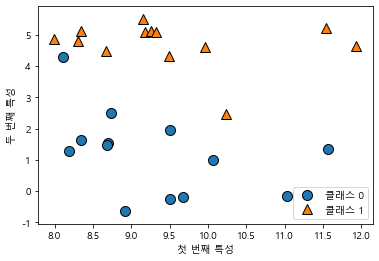

In [16]:
x, y = mglearn.datasets.make_forge()

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

mglearn.discrete_scatter(x[:, 0], x[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", x.shape)
plt.show()


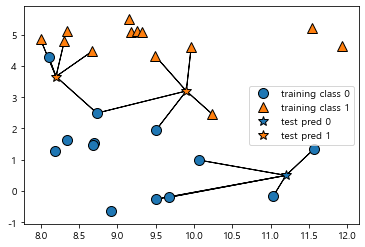

In [25]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import mglearn
import matplotlib.pyplot as plt
from matplotlib import rc

x, y = mglearn.datasets.make_forge()
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0) 
# x,y 트레인,테스트를 쪼갬 x=독립변수 y=종속변수
# random_state 시드를 고정하고 섞음 -> 같은 시도에서 같은 결과

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [30]:
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
print('테스트 세트 예측: ', model.predict(x_test))
print('테스트 세트 정확도 : {:.2f}'.format(model.score(x_test, y_test)))

테스트 세트 예측:  [1 0 1 0 1 0 0]
테스트 세트 정확도 : 0.86


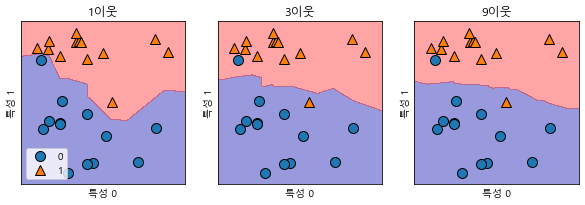

In [43]:
gif, axes = plt.subplots(1,3, figsize=(10,3), facecolor="w")

for n_neighbors, ax in zip([1,3,9], axes) :
    
    model = KNeighborsClassifier(n_neighbors= n_neighbors).fit(x,y)
    mglearn.plots.plot_2d_separator(model, x, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(x[:,0], x[:,1], y, ax=ax)
    ax.set_title('{}이웃'.format(n_neighbors))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
axes[0].legend(loc=3)

# 1이웃 과대 적합 
# 9이웃 과소 적합


In [54]:
data = [1,2,3,4,5,6,7,8,9,10,25,77,38.5]
max_value = np.max(data)
min_value = np.min(data)

min_max_scaling=[]

for i in data:
    min_max_scaling.append((i-min_value)/(max_value-min_value))
min_max_scaling

[0.0,
 0.013157894736842105,
 0.02631578947368421,
 0.039473684210526314,
 0.05263157894736842,
 0.06578947368421052,
 0.07894736842105263,
 0.09210526315789473,
 0.10526315789473684,
 0.11842105263157894,
 0.3157894736842105,
 1.0,
 0.4934210526315789]

In [55]:
from sklearn.preprocessing import MinMaxScaler
data = np.array(data)
scaler = MinMaxScaler()
scaler.fit(data.reshape(-1, 1))
scaled_data = scaler.transform(data.reshape(-1,1))
print(scaled_data)


[[0.        ]
 [0.01315789]
 [0.02631579]
 [0.03947368]
 [0.05263158]
 [0.06578947]
 [0.07894737]
 [0.09210526]
 [0.10526316]
 [0.11842105]
 [0.31578947]
 [1.        ]
 [0.49342105]]


In [56]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [65]:
cancer = load_breast_cancer()

In [70]:
data = pd.DataFrame(cancer["data"], columns = cancer['feature_names'])
target = pd.DataFrame(cancer["target"], columns = ['target'])
can = pd.concat([data, target], axis =1)
can

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [72]:
can["target"].value_counts()

1    357
0    212
Name: target, dtype: int64

In [89]:
x_train, x_test, y_train, y_test = train_test_split(can[cancer["feature_names"]],can["target"], random_state=0, stratify=cancer.target)


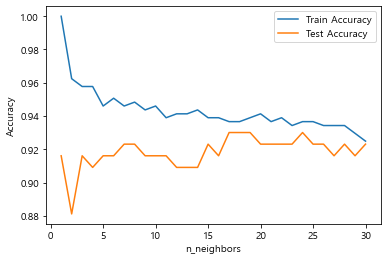

(0.9300699300699301, 17)

In [131]:
train_acc = []
test_acc= []
max_test = 0
num = 0
for i in range(1,31):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    
    train_acci = model.score(x_train, y_train)
    test_acci = model.score(x_test, y_test)
    
    train_acc.append(train_acci)
    test_acc.append(test_acci)
    if (test_acci > max_test):
        max_test = test_acci
        num = i
    elif(test_acci == max_test and abs(train_acci-test_acci) < abs(train_acc[num-1]-test_acci)):
        num = i
        
plt.plot(range(1,31),train_acc, label="Train Accuracy")
plt.plot(range(1,31),test_acc, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()
max_test,num

True